In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_csv("D:/Data Analytics/Projects/Python Project/Customer Churn Analysis/Dataset/Customer Churn.csv")

In [4]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# replacing blanks with 0 as tenure is 0 and no total charges are recorded

In [34]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [33]:
df.duplicated().sum()

np.int64(0)

In [32]:
df["customerID"].duplicated().sum()

np.int64(0)

In [26]:
df["SeniorCitizen"]= df["SeniorCitizen"].replace("0","no")
df["SeniorCitizen"]= df["SeniorCitizen"].replace("1","yes")

In [30]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"
df["SeniorCitizen"]= df["SeniorCitizen"].apply(conv)        

# converted 0 and 1 values of senior citizen to yes/no to make it easier to understand.

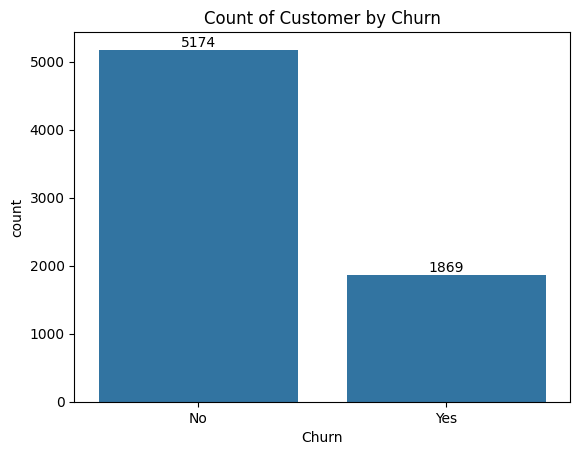

In [59]:
ax = sns.countplot(data=df,x="Churn")
ax.bar_label(ax.containers[0])
# for bars in ax.containers:
    # ax.bar_label(bars)
plt.title("Count of Customer by Churn")
plt.show()

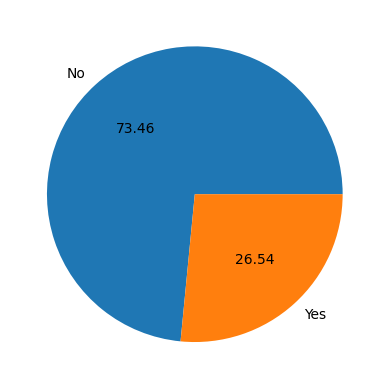

In [52]:
pies=df['Churn'].value_counts()
plt.pie(pies,labels=pies.index,autopct='%.2f')
plt.show()

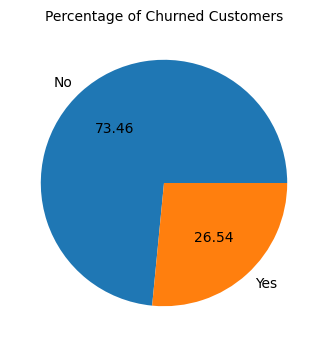

In [61]:
plt.figure(figsize = (4,4))
gb= df.groupby("Churn").agg({'Churn':'count'})
gb
plt.pie(gb['Churn'],labels = gb.index,autopct='%.2f')
plt.title("Percentage of Churned Customers",fontsize=10)
plt.show()


# from the given pie chart we can conclude that 26.54% of our customers have churned out.
# now let's explore the reason behind it.

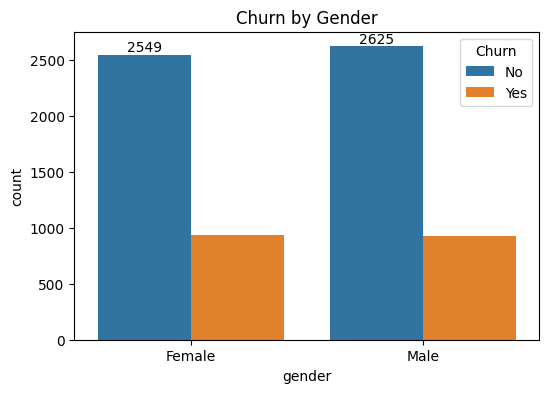

In [71]:
plt.figure(figsize=(6,4))
ax=sns.countplot(x="gender",data=df,hue='Churn')
ax.bar_label(ax.containers[0])
plt.title("Churn by Gender")
plt.show()

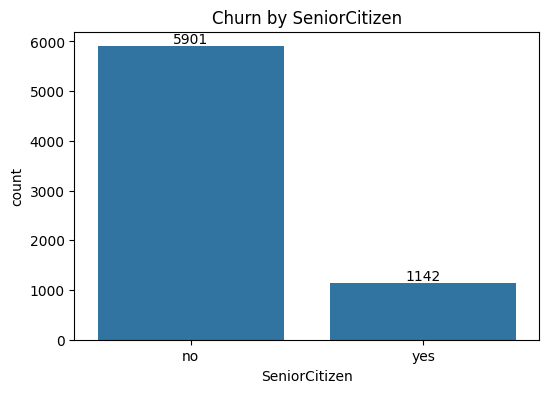

In [81]:
plt.figure(figsize=(6,4))
ax=sns.countplot(x="SeniorCitizen",data=df)
ax.bar_label(ax.containers[0])
plt.title("Churn by SeniorCitizen")
plt.show()

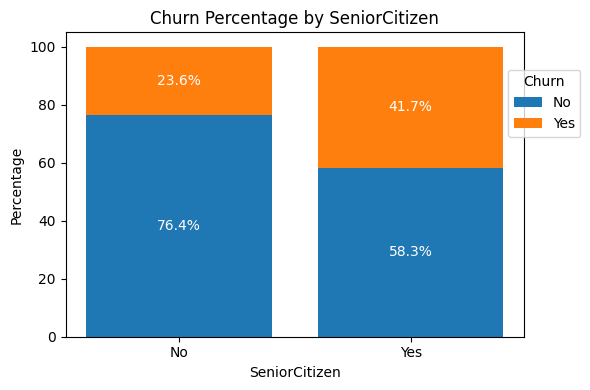

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Create a crosstab of SeniorCitizen vs Churn
cross_tab = pd.crosstab(df['SeniorCitizen'], df['Churn'])

# Step 2: Calculate percentage (row-wise)
cross_tab_percent = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100

# Step 3: Plot stacked bar chart
fig, ax = plt.subplots(figsize=(6, 4))

# Bottom for stacking
bottom_values = [0] * len(cross_tab_percent)

# Loop over each 'Churn' category (e.g., 'Yes' and 'No')
for churn_status in cross_tab_percent.columns:
    values = cross_tab_percent[churn_status]
    ax.bar(cross_tab_percent.index, values, bottom=bottom_values, label=churn_status)
    
    # Add percentage labels
    for i, (b, v) in enumerate(zip(bottom_values, values)):
        ax.text(i, b + v / 2, f'{v:.1f}%', ha='center', va='center', color='white', fontsize=10)
    
    # Update bottom
    bottom_values = [i + j for i, j in zip(bottom_values, values)]

# Final touches
plt.title("Churn Percentage by SeniorCitizen")
plt.xlabel("SeniorCitizen")
plt.ylabel("Percentage")
plt.xticks([0, 1], ['No', 'Yes'])  # assuming 0 = No, 1 = Yes
plt.legend(title='Churn',bbox_to_anchor=(0.9,0.9))
plt.tight_layout()
plt.show()


# Although the number of senior citizen users is lower, but their churn rate is comparatively higher, which provides a stronger insight.

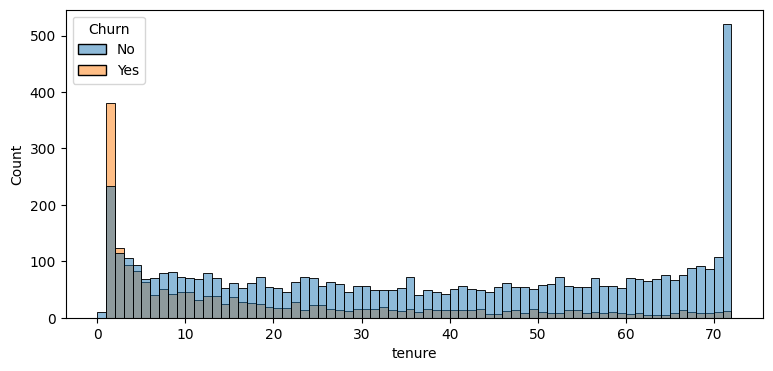

In [90]:
plt.figure(figsize=(9,4))
sns.histplot(x="tenure",data=df,bins=72,hue='Churn')
plt.show()

# people who have used our services for a long time have stayed and people who have used our services for 1 or 2 months have churned

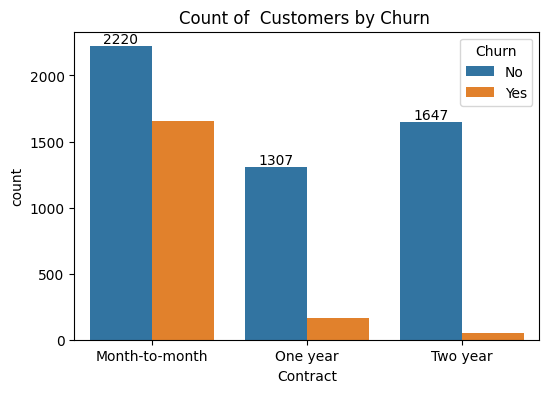

In [94]:
plt.figure(figsize=(6,4))
ax=sns.countplot(x="Contract",data=df,hue='Churn')
ax.bar_label(ax.containers[0])
plt.title("Count of  Customers by Churn ")
plt.show()

# people who have month to month contract are likely to churn then from those who have 1 or 2 year contract.

In [96]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

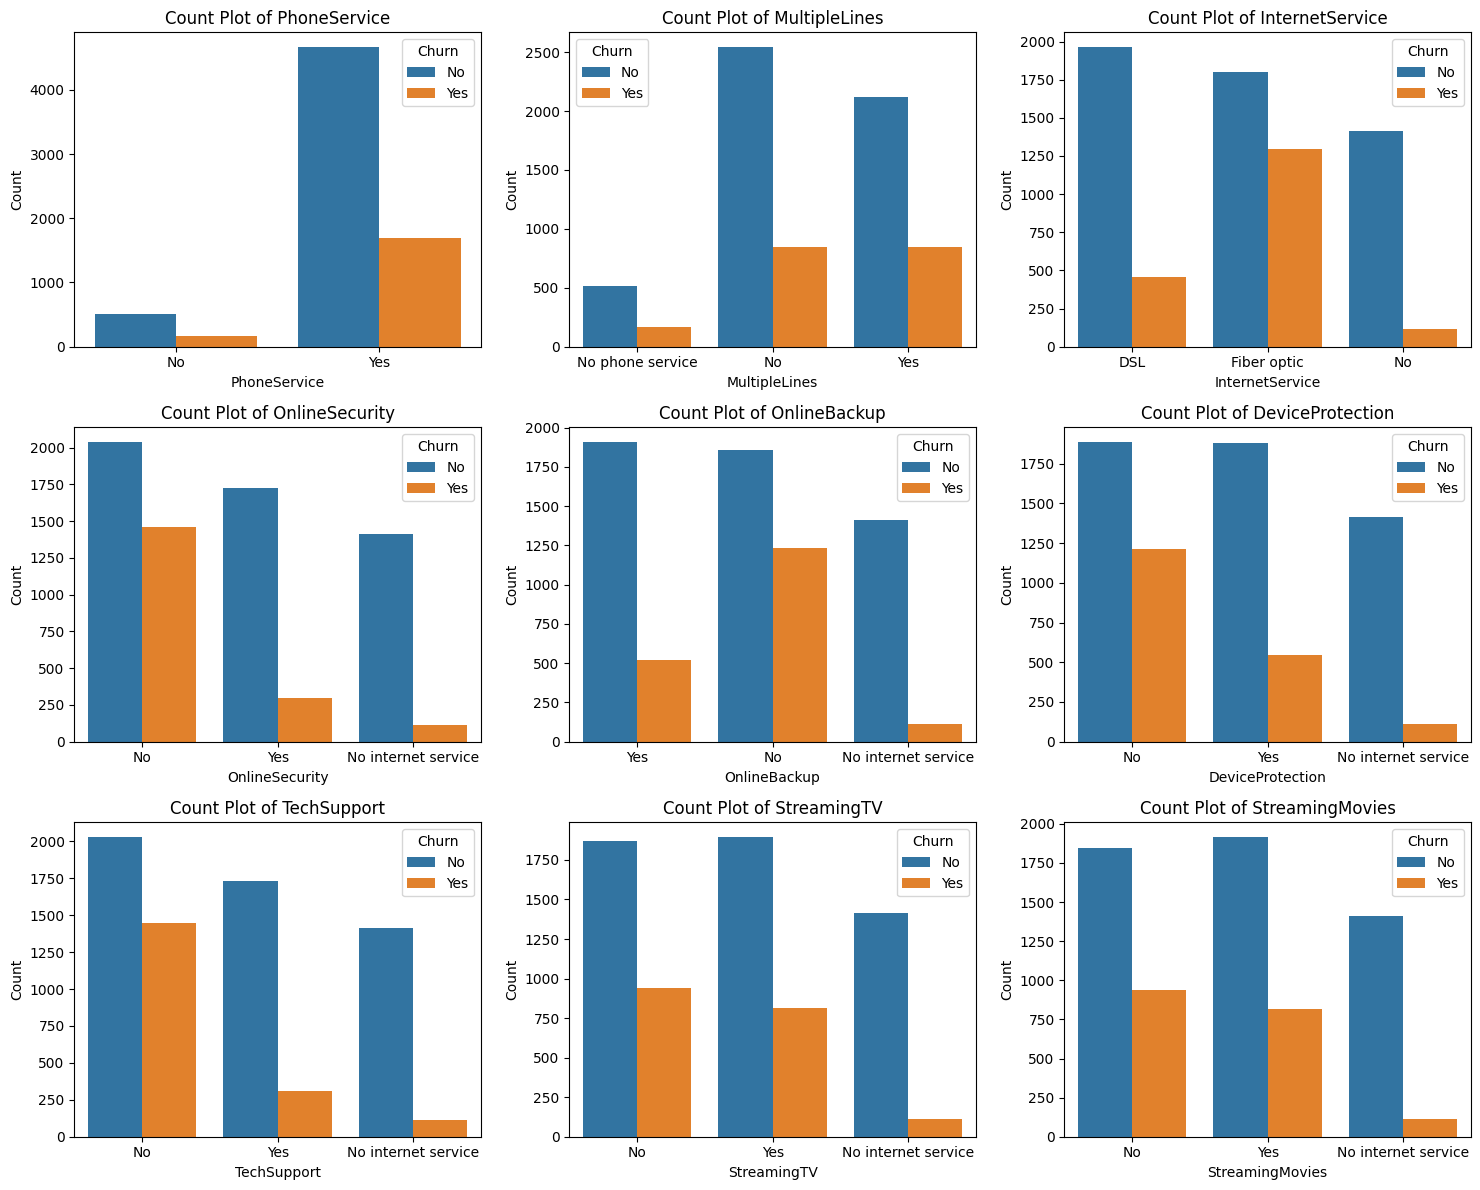

In [99]:
# List of columns you want to plot
columns = ['PhoneService', 'MultipleLines', 'InternetService',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies']

# Set number of rows and columns for subplots
n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols  # Ceiling division to calculate rows

# Set the figure size
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot each countplot in a subplot
for i, col in enumerate(columns):
    sns.countplot(data=df, x=col, ax=axes[i],hue='Churn')
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Remove unused subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# The subplot grid reveals a strong pattern: customers who lack optional services like OnlineSecurity, TechSupport, and StreamingTV are more likely to churn. In contrast, those who actively use these services tend to stay, highlighting that service engagement is closely linked to customer retention.

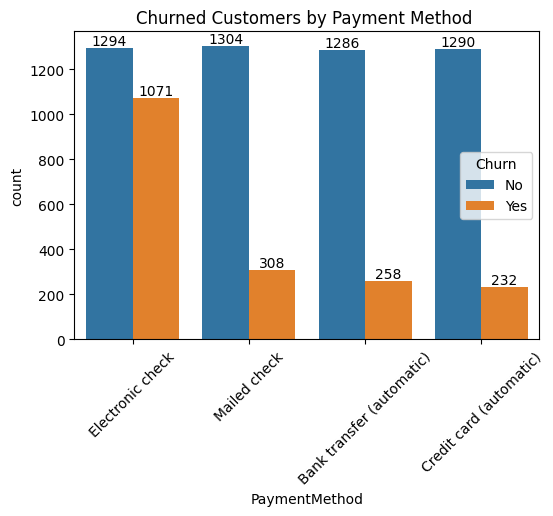

In [105]:
plt.figure(figsize=(6,4))
ax=sns.countplot(x="PaymentMethod",data=df,hue='Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churned Customers by Payment Method ")
plt.xticks(rotation=45)
plt.show()

# customer is likely to churn when he is using electronic check as a payment method